## Multinomial Logistic Regression - Roshan Parajuli

Multinomial Logistic Regression or Multiclass Classification is an extension of Binomial Logistic Regression which is used to model nominal outcome variables. 

Importing the necessary libraries is the first step. Numpy is imported for the mathematical operations in an array as it contains the multi-dimensional array and data structures. Numpy array are faster than numpy lists as it stores values in the contiguous blocks of memory. Pandas is imported as it offers data structures and operations for numerical tables. It helps on data analysis with its highly optimized performance. Pyplot class from matplotlib is imported for the visualization of data.

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset used in this assessment is the one which contains the details of 7 species of fish data for market sale. 

Here, Weight is the weight of fish in gram
Length1 is the vertical length in cm
Length2 is the diagonal length in cm
Length3 is the cross length in cm
Height is the height in cm
and Width is the diagonal width in cm.

These are the inputs. The objective is to predict the species of fish with the help of these data points.

In [302]:
df = pd.read_csv("Fish.csv")
df.sample(frac=0.04,axis='rows') #Randomly selecting 4 percent of total rows.

,Species,Weight,Length1,Length2,Length3,Height,Width
77,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
145,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
69,Parkki,200.0,21.2,23.0,25.8,10.3458,3.6636
134,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
18,Bream,610.0,30.9,33.5,38.6,15.6330,5.1338
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900


In [303]:
df.shape

(147, 7)

Observing the shape of the total dataset concludes that the dataset has 147 columns and 7 rows. Some rows might be removed during the data exploration and visualization process if it does not contribute to predicting the species of the fish.

In [304]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,409.938095,26.469388,28.642857,31.554422,9.129392,4.440456
std,363.329041,10.200649,10.947052,11.842981,4.379883,1.717135
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.000000,21.000000,22.950000,6.141150,3.363600
50%,300.000000,25.400000,27.500000,30.800000,8.323000,4.335000
75%,682.500000,32.750000,36.000000,39.750000,12.437650,5.658300
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


This is the overall summary of the dataset which is extracted with the describe method. Since the values of the three different lengths are close to each other, it seems as if a single column with the average value of the all the three columns would be proper in this dataset.

In [305]:
df['Length_average'] = df.Length1 + df.Length2 + df.Length3 / 3
df = df.drop(columns=["Length1","Length2","Length3"])
df

,Species,Weight,Height,Width,Length_average
0,Bream,242.0,11.5200,4.0200,58.600000
1,Bream,290.0,12.4800,4.3056,60.700000
2,Bream,340.0,12.3778,4.6961,60.766667
3,Bream,363.0,12.7300,4.4555,66.466667
4,Bream,430.0,12.4440,5.1340,66.833333
...,...,...,...,...,...
142,Smelt,12.2,2.0904,1.3936,28.166667
143,Smelt,13.4,2.4300,1.2690,28.600000
144,Smelt,12.2,2.2770,1.2558,29.700000
145,Smelt,19.7,2.8728,2.0672,32.566667


Separating the data into X and Y dataframes by the integer location function.

In [306]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X

,Weight,Height,Width,Length_average
0,242.0,11.5200,4.0200,58.600000
1,290.0,12.4800,4.3056,60.700000
2,340.0,12.3778,4.6961,60.766667
3,363.0,12.7300,4.4555,66.466667
4,430.0,12.4440,5.1340,66.833333
...,...,...,...,...
142,12.2,2.0904,1.3936,28.166667
143,13.4,2.4300,1.2690,28.600000
144,12.2,2.2770,1.2558,29.700000
145,19.7,2.8728,2.0672,32.566667


In [307]:
y

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
142    Smelt
143    Smelt
144    Smelt
145    Smelt
146    Smelt
Name: Species, Length: 147, dtype: object

Since the data present in the dataset are on different scale, to bring them to the same scale, normalization is done. Normalization changes the values of numeric columns in the dataset to a common scale without distorting differences in the range of values. Here, We are iterating through each row and applying normalization to every numerical column there is by diving each data point by the maximum point in that column. If we take an example of the rows and columns in 0 index, the weight is 242 and previously with the details method we saw that the maximum weight among all the species was 1650.00 if the weight is devided by the maximum weight, we gat 0.146667 as seen in the dataframe below.

In [308]:
#Normalizing data to bring it to the same scale
for i in range(0,len(X.columns)):
    X.iloc[:,i] = X.iloc[:,i]/np.max(X.iloc[:,i])
X

,Weight,Height,Width,Length_average
0,0.146667,0.607691,0.493736,0.403952
1,0.175758,0.658332,0.528814,0.418428
2,0.206061,0.652941,0.576775,0.418888
3,0.220000,0.671520,0.547224,0.458180
4,0.260606,0.656433,0.630558,0.460708
...,...,...,...,...
142,0.007394,0.110271,0.171162,0.194164
143,0.008121,0.128185,0.155859,0.197151
144,0.007394,0.120114,0.154237,0.204733
145,0.011939,0.151543,0.253893,0.224494


### Visualizing the dataset

After putting each and every feature on a scatter plot, we can conclude that the weight of the fishes is more distributed in comparison to other features like the width for instance. Not much data can be derived from the plot to see which features were the most prominent and which were not. We will treat every feature as equally important in the dataset and not create any biases in the features.

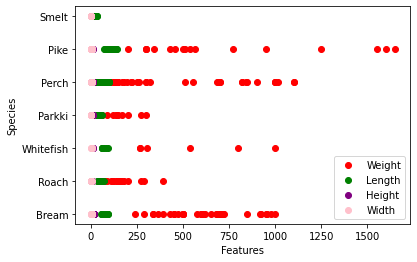

In [309]:
plt.xlabel('Features')
plt.ylabel('Species')

pltX = df.loc[:, 'Weight']
pltY = df.loc[: , 'Species']
plt.scatter(pltX,pltY, color='red', label='Weight')

pltX = df.loc[:, 'Length_average']
pltY = df.loc[: , 'Species']
plt.scatter(pltX,pltY, color='green', label='Length')

pltX = df.loc[:, 'Height']
pltY = df.loc[: , 'Species']
plt.scatter(pltX,pltY, color='purple', label='Height')

pltX = df.loc[:, 'Width']
pltY = df.loc[: , 'Species']
plt.scatter(pltX,pltY, color='pink', label='Width')

plt.legend()
plt.show()

The dataframe is now divided into two parts. Testing set and training set. If all the data we have is used for training, there would be no data which helps to evaulate the machine learning model. The data might get overfitted producing a great accuracy in the given dataset but might end up being totally unreliable for new dataset. To avoid that problem, we split the dataset and allocate a certain percentage of data for training and remaining for testing. There should be a balance in it. 

The main aim here is not to learn on the largest dataset possible but to learn effectively so that the model would perform well if tested in an unknown dataset. Here in this dataset, the train size is set to 0.7. It is by no means an standard size. It can be tweaked to change the accuracy of the model. Here, 70% data from the entire dataset is trained and the remaining is allocated for testing. Setting random state to a random number ensures that everytime the program is run, the same output is expected. It doesnot matter what number is set inside the random state but splitting of data frame differs if the random state is changed and the program is re-run.

In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.65,random_state=30)

Model variable is initialized with the LogisticRegression constructor. And now "model" is ready to fit the train data as splitted above. Keeping the multiclass parameter as multinomial (since we are dealing with multiclass data), the class is instantiated.

In [311]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="multinomial")

In [312]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [313]:
y_pred = model.predict(X_test)

Now the model has successfully predicted the testing set, accuracy is to be calculated. For the calculation of accuracy, score method is used. When the data from X_train is used to make predictions, the predictions does not completely match Y_train but it does produce Y_train' which is close to Y_train. So that means, Y_train' = model.predict(X_train). The score method internally calculates the difference between the Y_train and Y_train' even though Y_train may or may not be explicitely calculated. 

In the below cell, since X_test and y_test is provided, the model is calculating y_test' from X_test internally and comparing it with the original y_test to give an accuracy measure. 

In [314]:
model.score(X_test, y_test)

0.6730769230769231

If there is an imbalance in the data, accuracy can be a misleading metric. Let's say we have model which predicts whether a person has Spinal muscular atrophy. It is a very rare disease. If there are 1,000,000 total people and only 1 of them had the disease. Even if our model is accurate 99.99% of time, it predicted 0 patients of the disease. 99.99 percent seems like a huge accuracy but actually what actually it did was, it gave us 99.99% accuracy if the person had a disease and 0% when the person didn't. Thus, this is especially relevant for such model those claim to predict rare events. To examine the proper accuracy we need to take a look at the confusion matrix.

Accuracy defines how often is our classifer correct. In this dataset, which is assigned a certain random state while splitting, until it is changed, the model is 67.30% correct.

Misclassification rate defines exactly the opposite, that is: how often would the model be wrong. In this case, it is 100-67.30 i.e. 32.7

In [315]:
print(y_test.shape)

(52,)


Upon generating the confusion matrix with the test dataframe and its prediction, we get a 7x7 matrix because we have total of 7 classes to classify from. These are the seven classes:

In [316]:
print(y.unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [317]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13  0  0  0  0  0  0]
 [ 1  0  4  0  1  0  0]
 [ 4  0 15  0  0  0  0]
 [ 0  0  4  1  0  0  0]
 [ 0  0  2  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 1  0  0  0  0  0  0]]


For visual preference, a heatmap is made from the seaborn library and the same confusion matrix is sent to it along with the labels.

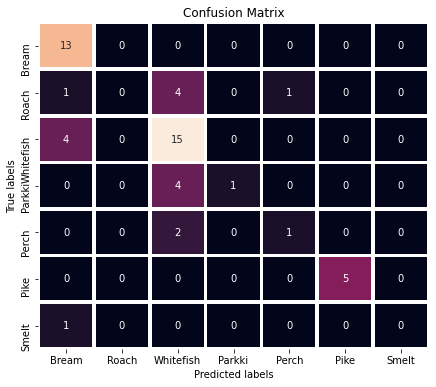

In [318]:
import seaborn as sns

plt.figure(figsize = (7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidth=2.5, ax = ax, cbar=False); #annot=True to annotate cells

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y.unique()); ax.yaxis.set_ticklabels(y.unique());

Here, we can clearly see all the errors that our model has made during the classification. The diagonal elements from the Bream to the Smelt are the true positives. If we look at the first cell, we see 13. It states that 13 species of fishes which were breams were correctly classified. If we sum the first row, we get total sum to be 13 and it is the actual count in the dataset. If we sum the first column of the same species, we get the total sum to be 19. That clearly states that all the breams were correctly classified by the model but 6 other species of fish were also classified by the model to be breams. Similarly, after repeating the same phenomenon on every cell, we can analyse our model.

In [320]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bream       0.68      1.00      0.81        13
      Parkki       0.00      0.00      0.00         6
       Perch       0.60      0.79      0.68        19
        Pike       1.00      0.20      0.33         5
       Roach       0.50      0.33      0.40         3
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.67        52
   macro avg       0.54      0.47      0.46        52
weighted avg       0.61      0.67      0.60        52



If we generate a classification report based on how our model performed, it can be easily done by instantiating the classification_report class. This report gives us the information regerding precision, recall, f1-score, accuracy, and other metrics.

### Describing some metrics

**Precision**: 
Precision is a metric which should be used if false negative is not that big of a problem for us. It can be calculated by the formula TP/(TP+FP). When the model predicts correct, how often is it correct is given by precision. In an imbalanced classification problem with more than two classes, precision is calculated as the sum of true positives across all classes divided by the sum of true positives and false positives across all classes. For the Bream, the precision is found to be 0.68, that means when the model predicted a species to be breams, it was right 68% of time.

**Recall**: 
Recall is a metric which should be used if false negative is a very big problem for us and need to reduce it to the lowest point possible. In an imbalanced classification problem with more than two classes, recall is calculated as the sum of true positives across all classes divided by the sum of true positives and false negatives across all classes. Here the recall for the bream species is 1. As I previously stated, the model classified Breams if they were actually breams but mistook other species with bream as well. That means Recall is the value which gives us the rate of the model predicting X, when its actually X. It is also referred to as the true positive rate.

**f1-score**: 
It is a weighted average of the true positive rate and precision. For a high F score, it is important to have a high precision and recall value. Sometimes, when the precion is high, recall is low and vice versa. In such condition, we have to calculate f-score i.e The harmonic mean. If we calculate arithemetic mean, the result would be very far from the what it should have been. It is also called f1 score. Its formula simplified is: 2. (precision.recall)/(precision+recall)

**Macro Average vs. Weighted Average**

Macro Average is the average of the metric of the different classes.

If PC1, PC2, PC3 are the precision of the respective classses, Macro Average Precision would be (PC1+PC2+PC3)/3.

Weightage Average is the we will not simply use average, we will give weightage to each and every instances. For classes with 3 classes, the formula would be:

Actual Class A Instance Precision of Class A + Actual Class B instance Precision of Class B + Actual Class C instance * Precision of CLass C.


**Null Error Rate**

In the above dataset, the majority class is Whitefish. If the model always predicted that only, how often would it be wrong is defined by null error rate. 

Let's say we have a dataset on which the number of Actual No is 60 and actual yes is 105 and thus the total data points are 165. In this case, If the model always predicted yes (because it is the majority class here), it would be wrong for 
Actual No / Total data points
number of time. In this case, null error rate would be 60/165 = 0.36.

**Cohens cappa**

It is the measure of how well our classifier performed as compared to how well it would have performed. A model would have high Kappa score if there is a big difference between the accuracy and null error rate. It can be used to access the performance of a classification model. It is often used to access the agreement between two raters. We can say kappa statistic is a metric that compares an observed accuracy with an expected accuracy.

It is an important measure on classifier performance, expecially on imbalanced data set. For example: For a fraud detection dataset, 99.9% of the transactions will be non-fraud transactions. We can have a trivial classifier that always says non-fraud to every transaction, and we will still have 99.9% of the accuracy. It measures how much better the classifier is, compared to guessing with the target distribution.

**ROC Curve (Receiver Operating Characteristic curve)**

ROC Curve is the metric we use to find the threshold in our logistic regression model. We can say that it is used to calculate the performance of a binary classifier. It is a probability curve that plots the TPR against FPR at various threshold values. We generally use 0.5 as the threshold i.e. anyhing greater than 0.5 and itself will be classified as 1 and anything less that that will be classified at 0. This is not always a good threshold. Sometimes we may want higher True Positive Rate and very less False Positive Rate and other times we might want Very High True Positive Rate and not care too much about false Positive rate. This can be determined by the ROC curve. AUC is just the area under the curve. This is used as a summary of ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.